In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

*>> This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. on the basis of this data i want to predict whether the loan of the applicant will be approved or not  


*>> In this dataset set my target variable is Loan Status and other columns are my features 

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.to_csv('loan.csv')

With the help of this code i can forved thid dataset to exel file

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

i can see that in gender, Married, Dependents, Selfemployed, LoanA mount, etc column have null values so firstly i can remove all the null values with the help of mean median and mode in object columns we can use mode in int column we can use mean and median   >>>>

In [5]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [6]:
df['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [7]:
df['Married'].mode()

0    Yes
Name: Married, dtype: object

In [8]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [9]:
df['Self_Employed'].fillna('No',inplace= True)
df['Married'].fillna('Yes',inplace= True)
df['Gender'].fillna('Male',inplace= True)

In [10]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [11]:
df['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [12]:
df['Dependents'].fillna('0',inplace= True)

Now all the null values have been remove and my data is full fill

In [14]:
from tqdm import tqdm

with the help of tqdm we can see my data is run or stuck in middle 

100%|██████████| 13/13 [00:02<00:00,  5.37it/s]


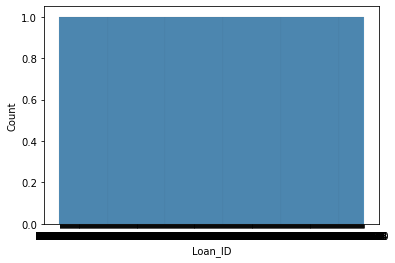

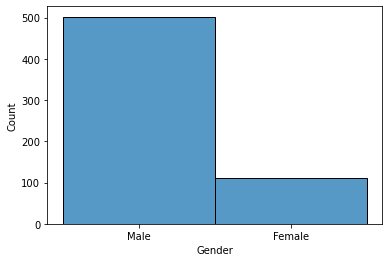

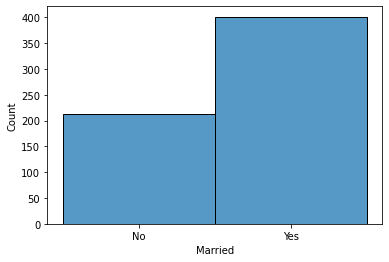

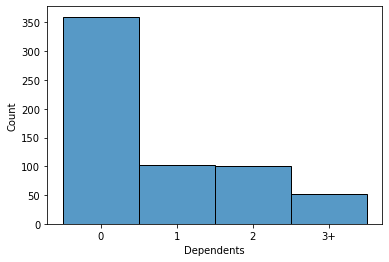

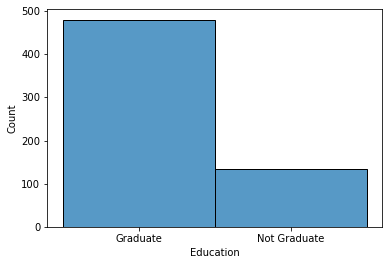

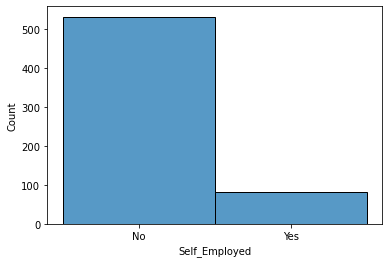

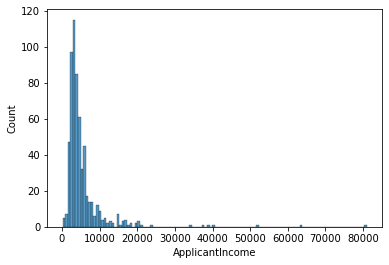

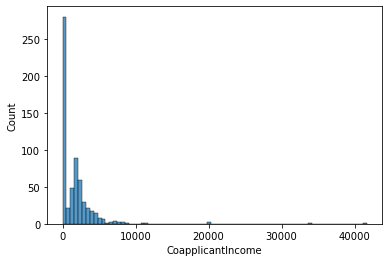

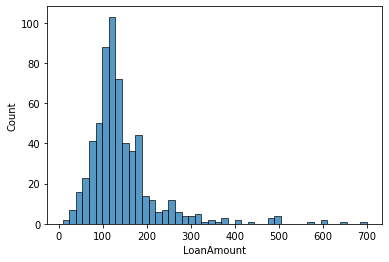

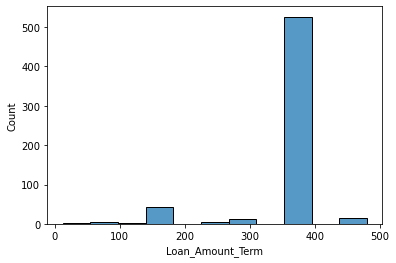

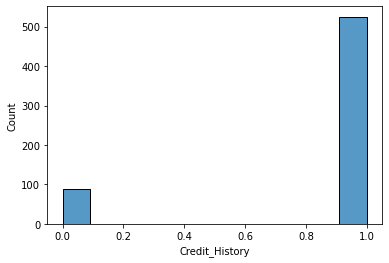

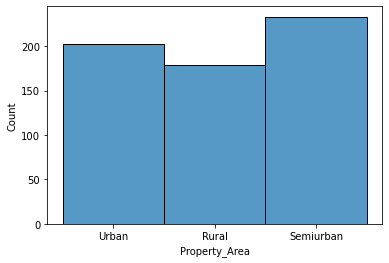

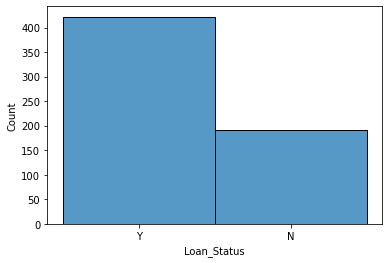

In [15]:
M = df.columns
for i in tqdm(M):
    plt.figure()
    sns.histplot(df[i])

<AxesSubplot:>

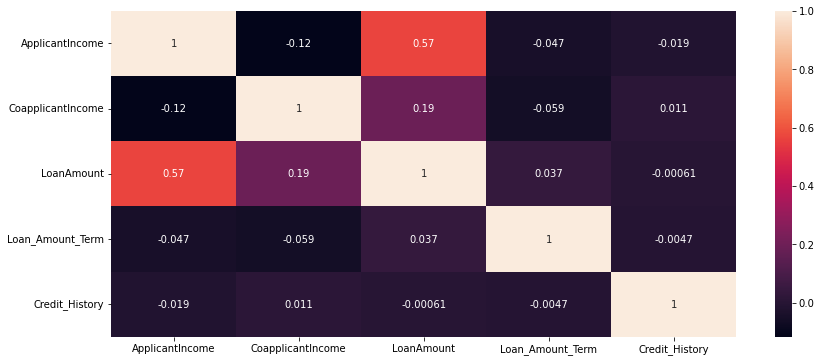

In [16]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),annot=True)

We can see that with the help of heatmap corr

* applicantincome and LoanAmount are highly corelated with each other
* LoanAmount and Coapplicantincome are normaly corelated with each other
* And other left columns are very less negatively corelated with each other

Loan_id and Married column are not very usefull for my prediction so i can drop it

In [17]:
df.drop('Loan_ID',axis=1,inplace=True)

In [18]:
df.drop('Married',axis=1,inplace=True)

<Figure size 432x288 with 0 Axes>

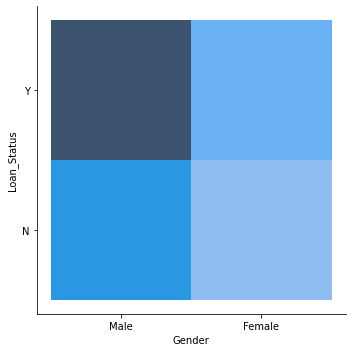

<Figure size 432x288 with 0 Axes>

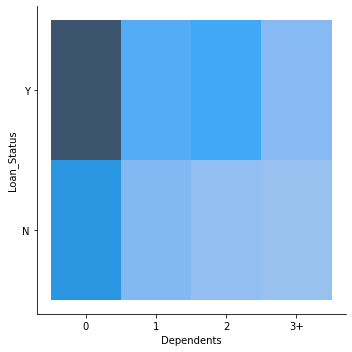

<Figure size 432x288 with 0 Axes>

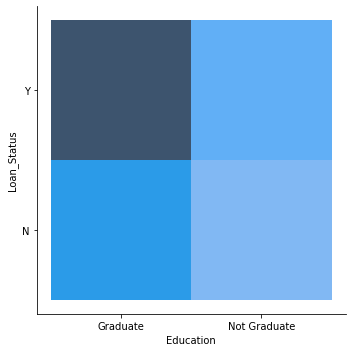

<Figure size 432x288 with 0 Axes>

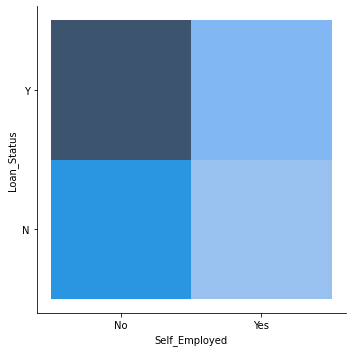

<Figure size 432x288 with 0 Axes>

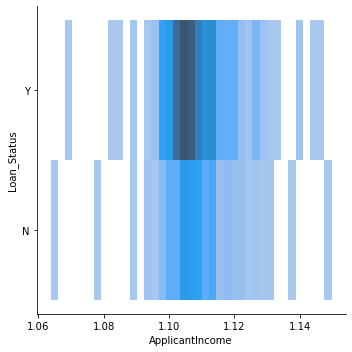

<Figure size 432x288 with 0 Axes>

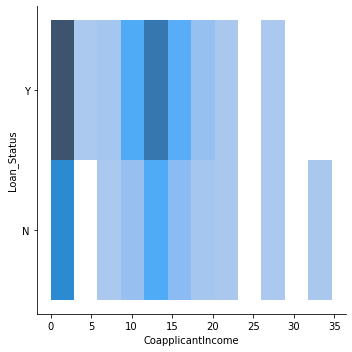

<Figure size 432x288 with 0 Axes>

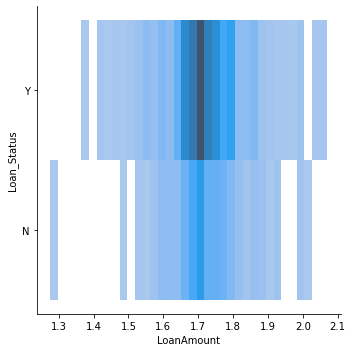

<Figure size 432x288 with 0 Axes>

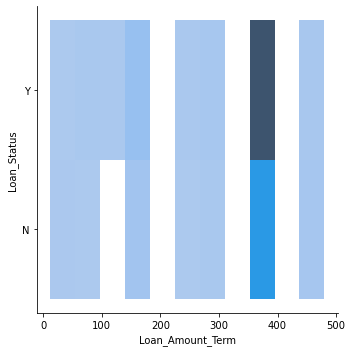

<Figure size 432x288 with 0 Axes>

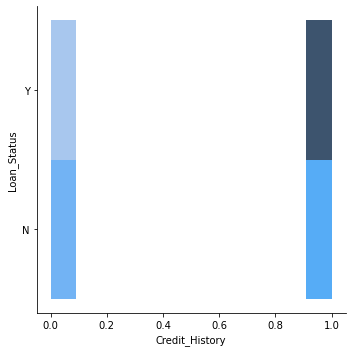

<Figure size 432x288 with 0 Axes>

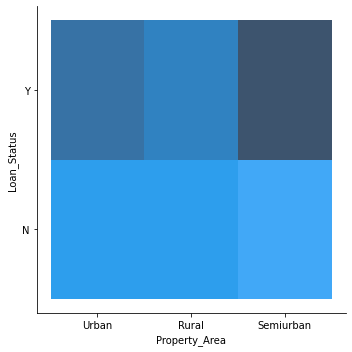

<Figure size 432x288 with 0 Axes>

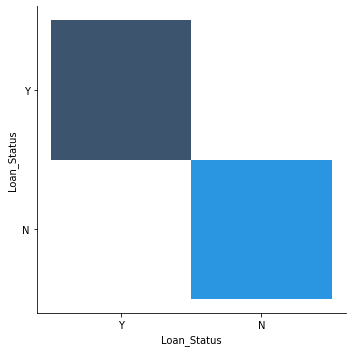

In [49]:
columns= df.columns
for i in columns:
    plt.figure()
    sns.displot(x=df[i],y='Loan_Status',data=df)   

In [27]:
df.isnull().sum()

Gender               0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
df.dtypes

Gender                object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

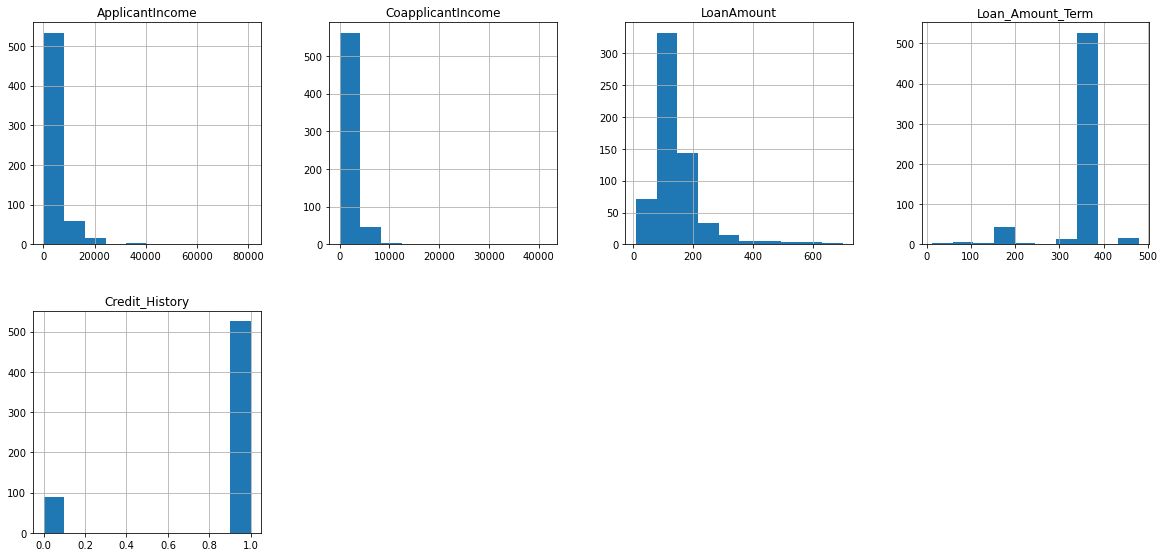

In [29]:
df.hist(figsize=(20,20),grid=True,layout=(4,4))

Now i can see that the column ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History all this column have skewness some columns are left skewed and other are right skewed so firstly i can remove skewness

In [30]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [31]:
from scipy.stats import skew

In [38]:
df['ApplicantIncome']=np.cbrt(df['ApplicantIncome'])

In [40]:
df['CoapplicantIncome']=np.cbrt(df['CoapplicantIncome'])

In [44]:
df['LoanAmount']=np.cbrt(df['LoanAmount'])

In [45]:
df.skew()

ApplicantIncome      0.543922
CoapplicantIncome    0.196726
LoanAmount           0.180761
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

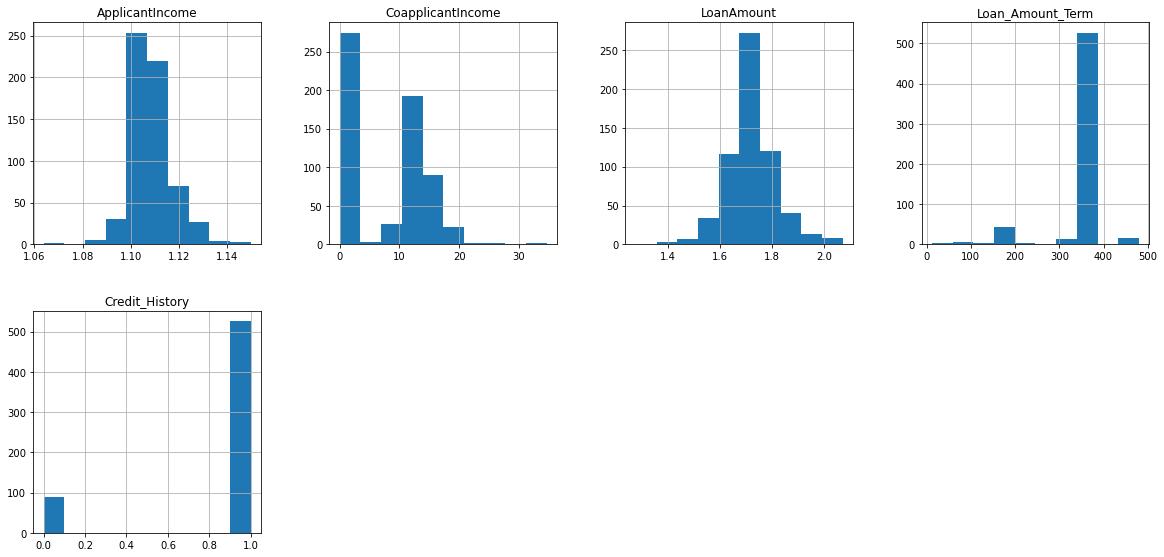

In [50]:
df.hist(figsize=(20,20),grid=True,layout=(4,4))

Now skewness has been removed from all the columns 

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
LE=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=LE.fit_transform(df[i].values)
df 

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,1.113031,0.000000,1.714488,360.0,1.0,2,1
1,1,1,0,0,1.109684,11.467457,1.714488,360.0,1.0,0,0
2,1,0,0,1,1.103894,0.000000,1.592838,360.0,1.0,2,1
3,1,0,1,0,1.101856,13.310098,1.702237,360.0,1.0,2,1
4,1,0,0,0,1.113381,0.000000,1.733014,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,1.103432,0.000000,1.605814,360.0,1.0,0,1
610,1,3,0,0,1.108179,0.000000,1.506630,180.0,1.0,0,1
611,1,1,0,0,1.117466,6.214465,1.849326,360.0,1.0,2,1
612,1,2,0,0,1.116604,0.000000,1.788244,360.0,1.0,2,1


With the help of lable encoder i can change the string data to int data

# Removing Outlyers on this data

In [53]:
from scipy.stats import zscore

In [54]:
z= np.abs(zscore(df))
z

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,0.737806,0.528362,0.392601,0.512243,1.053225,0.038033,0.273231,0.411733,1.223298,0.674519
1,0.472343,0.253470,0.528362,0.392601,0.133700,0.561256,0.038033,0.273231,0.411733,1.318513,1.482537
2,0.472343,0.737806,0.528362,2.547117,0.521213,1.053225,1.326802,0.273231,0.411733,1.223298,0.674519
3,0.472343,0.737806,1.892641,0.392601,0.751704,0.820678,0.167815,0.273231,0.411733,1.223298,0.674519
4,0.472343,0.737806,0.528362,0.392601,0.551865,1.053225,0.158235,0.273231,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,0.737806,0.528362,0.392601,0.573462,1.053225,1.189326,0.273231,0.411733,1.318513,0.674519
610,0.472343,2.236021,0.528362,0.392601,0.036492,1.053225,2.240091,2.522836,0.411733,1.318513,0.674519
611,0.472343,0.253470,0.528362,0.392601,1.013917,0.178302,1.390446,0.273231,0.411733,1.223298,0.674519
612,0.472343,1.244745,0.528362,0.392601,0.916438,1.053225,0.743346,0.273231,0.411733,1.223298,0.674519


In [55]:
print(np.where(z>3))

(array([ 14,  14,  68,  94,  94, 130, 133, 133, 155, 155, 171, 171, 183,
       185, 216, 242, 262, 313, 333, 369, 409, 443, 468, 495, 497, 546,
       561, 568, 575, 581, 585, 600, 600], dtype=int64), array([6, 7, 7, 6, 7, 6, 6, 7, 4, 6, 4, 6, 4, 4, 4, 7, 7, 7, 4, 6, 4, 4,
       4, 7, 7, 7, 6, 6, 7, 5, 7, 4, 5], dtype=int64))


In [56]:
df1= df[(z<3).all(axis=1)]
df1

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,1.113031,0.000000,1.714488,360.0,1.0,2,1
1,1,1,0,0,1.109684,11.467457,1.714488,360.0,1.0,0,0
2,1,0,0,1,1.103894,0.000000,1.592838,360.0,1.0,2,1
3,1,0,1,0,1.101856,13.310098,1.702237,360.0,1.0,2,1
4,1,0,0,0,1.113381,0.000000,1.733014,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,1.103432,0.000000,1.605814,360.0,1.0,0,1
610,1,3,0,0,1.108179,0.000000,1.506630,180.0,1.0,0,1
611,1,1,0,0,1.117466,6.214465,1.849326,360.0,1.0,2,1
612,1,2,0,0,1.116604,0.000000,1.788244,360.0,1.0,2,1


In [57]:
loss_percent=(614-587)/614*100
print(loss_percent)

4.397394136807818


With the help of Zscore i can remove skewness on this dataset and our loss of data is veryless and this loss is acceptable 

In [58]:
cor=df1.corr()
cor

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.191883,0.047731,-0.003641,0.051378,0.232420,0.156381,-0.102224,0.016074,-0.022088,0.010864
Dependents,0.191883,1.000000,0.058365,0.058845,0.118658,0.001334,0.142544,-0.083927,-0.026709,-0.005183,0.006274
Education,0.047731,0.058365,1.000000,-0.010160,-0.184536,0.020516,-0.144457,-0.093574,-0.077740,-0.066459,-0.094855
Self_Employed,-0.003641,0.058845,-0.010160,1.000000,0.192926,-0.060509,0.117075,-0.030284,-0.010510,-0.033492,-0.026727
ApplicantIncome,0.051378,0.118658,-0.184536,0.192926,1.000000,-0.342893,0.495073,-0.056261,0.049392,-0.036472,-0.012287
CoapplicantIncome,0.232420,0.001334,0.020516,-0.060509,-0.342893,1.000000,0.210196,-0.010131,-0.004975,-0.064664,0.055223
LoanAmount,0.156381,0.142544,-0.144457,0.117075,0.495073,0.210196,1.000000,0.063646,0.003855,-0.095674,-0.042405
Loan_Amount_Term,-0.102224,-0.083927,-0.093574,-0.030284,-0.056261,-0.010131,0.063646,1.000000,0.027747,-0.057229,-0.020026
Credit_History,0.016074,-0.026709,-0.077740,-0.010510,0.049392,-0.004975,0.003855,0.027747,1.000000,-0.009007,0.560053
Property_Area,-0.022088,-0.005183,-0.066459,-0.033492,-0.036472,-0.064664,-0.095674,-0.057229,-0.009007,1.000000,0.019963


In [59]:
cor['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.560053
CoapplicantIncome    0.055223
Property_Area        0.019963
Gender               0.010864
Dependents           0.006274
ApplicantIncome     -0.012287
Loan_Amount_Term    -0.020026
Self_Employed       -0.026727
LoanAmount          -0.042405
Education           -0.094855
Name: Loan_Status, dtype: float64

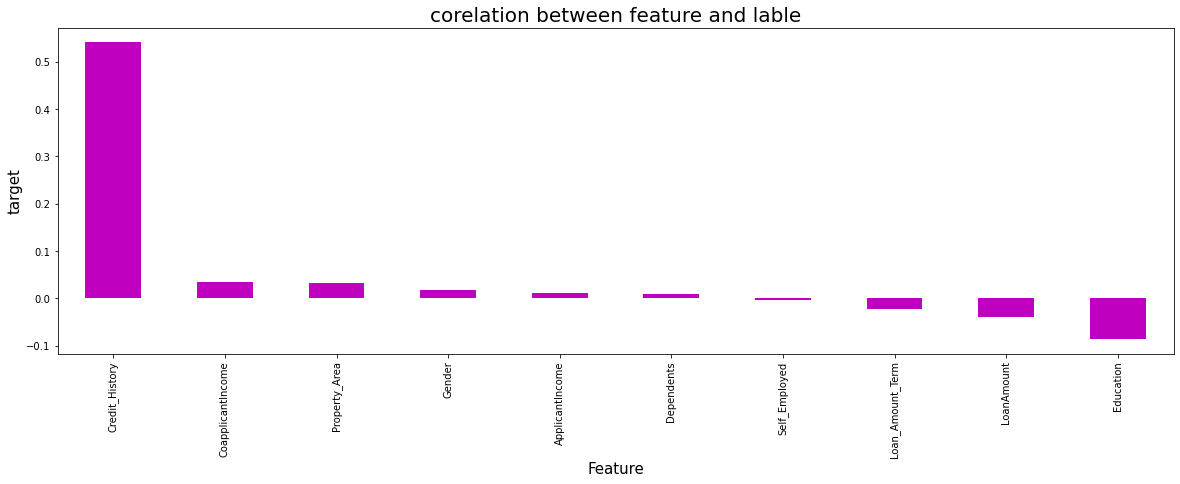

In [60]:
plt.figure(figsize=(20,6))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize= 15)
plt.ylabel('target',fontsize= 15)
plt.title('corelation between feature and lable',fontsize=20)
plt.show()

Gender column is very less corelated with my target variable so i can drop it

In [62]:
df1.drop('Gender',axis=1,inplace=True)

# Seperating Target And Features Variable

In [63]:
y=df1.iloc[:,-1]
x=df1.drop('Loan_Status',axis=1)

In [100]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 587, dtype: int32

In [65]:
from sklearn.preprocessing import MinMaxScaler
st = MinMaxScaler()
x = st.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8
0,0.000000,0.0,0.0,0.605724,0.000000,0.498232,0.6,1.0,1.0
1,0.333333,0.0,0.0,0.537898,0.422465,0.498232,0.6,1.0,0.0
2,0.000000,0.0,1.0,0.420553,0.000000,0.280425,0.6,1.0,1.0
3,0.000000,1.0,0.0,0.379254,0.490348,0.476298,0.6,1.0,1.0
4,0.000000,0.0,0.0,0.612823,0.000000,0.531402,0.6,1.0,1.0
...,...,...,...,...,...,...,...,...,...
582,0.000000,0.0,0.0,0.411191,0.000000,0.303659,0.6,1.0,0.0
583,1.000000,0.0,0.0,0.507403,0.000000,0.126075,0.0,1.0,0.0
584,0.333333,0.0,0.0,0.695612,0.228943,0.739651,0.6,1.0,1.0
585,0.666667,0.0,0.0,0.678146,0.000000,0.630288,0.6,1.0,1.0


With the help of MinMax scaller i can balanced my data from 0 to 1

# Now we go for data modelling

# Finding the best random state

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
maxaccu = 0
maxrs = 0
    
for i in tqdm(range (1,200)):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxaccu:
        maxaccu = acc
        maxrs = i

print("Best Accuracy score is:",maxaccu,'at Random state:',maxrs)

100%|██████████| 199/199 [00:50<00:00,  3.91it/s]

Best Accuracy score is: 0.8700564971751412 at Random state: 53


In [67]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = maxrs)

# Classification Algorithums &  Cross Validation Score

In [68]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
lg=LogisticRegression()
gnb=GaussianNB()
mnb= MultinomialNB()
dtc= DecisionTreeClassifier()
svm=SVC()
knn=KNeighborsClassifier()
RFC=RandomForestClassifier()
ETC=ExtraTreesClassifier()
model=[lg,gnb,mnb,dtc,svm,knn,RFC,ETC]

In [69]:
for M in tqdm(model):
    M.fit(x_train,y_train)
    pred=M.predict(x_test)
    print('accuracy score of ',M,'is',)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

 50%|█████     | 4/8 [00:00<00:00, 34.55it/s]

accuracy score of  LogisticRegression() is
0.8813559322033898
[[ 27  20]
 [  1 129]]
              precision    recall  f1-score   support

           0       0.96      0.57      0.72        47
           1       0.87      0.99      0.92       130

    accuracy                           0.88       177
   macro avg       0.92      0.78      0.82       177
weighted avg       0.89      0.88      0.87       177

accuracy score of  GaussianNB() is
0.8813559322033898
[[ 27  20]
 [  1 129]]
              precision    recall  f1-score   support

           0       0.96      0.57      0.72        47
           1       0.87      0.99      0.92       130

    accuracy                           0.88       177
   macro avg       0.92      0.78      0.82       177
weighted avg       0.89      0.88      0.87       177

accuracy score of  MultinomialNB() is
0.7344632768361582
[[  0  47]
 [  0 130]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      

100%|██████████| 8/8 [00:00<00:00, 12.25it/s]

0.8587570621468926
[[ 30  17]
 [  8 122]]
              precision    recall  f1-score   support

           0       0.79      0.64      0.71        47
           1       0.88      0.94      0.91       130

    accuracy                           0.86       177
   macro avg       0.83      0.79      0.81       177
weighted avg       0.85      0.86      0.85       177



In [72]:
for M in tqdm(model):
    print(M)
    score=cross_val_score(M,x,y,cv=5)
    print(score)
    print(score.mean())
    print('difference between and cross validation score is',accuracy_score(y_test,pred) - score.mean())
    print("\n")
    print("_____________________________________________________________________")

 12%|█▎        | 1/8 [00:00<00:00,  8.39it/s]

LogisticRegression()
[0.80508475 0.79661017 0.78632479 0.86324786 0.83760684]
0.8177748804867448
difference between and cross validation score is 0.040982181660147776


_____________________________________________________________________
GaussianNB()
[0.80508475 0.79661017 0.78632479 0.86324786 0.83760684]
0.8177748804867448
difference between and cross validation score is 0.040982181660147776


_____________________________________________________________________
MultinomialNB()


 38%|███▊      | 3/8 [00:00<00:00, 14.24it/s]

[0.69491525 0.68644068 0.7008547  0.69230769 0.69230769]
0.6933652035346951
difference between and cross validation score is 0.16539185861219752


_____________________________________________________________________
DecisionTreeClassifier()
[0.73728814 0.69491525 0.68376068 0.75213675 0.73504274]
0.7206287121541359
difference between and cross validation score is 0.1381283499927567


_____________________________________________________________________
SVC()


 62%|██████▎   | 5/8 [00:00<00:00, 11.80it/s]

[0.80508475 0.79661017 0.78632479 0.86324786 0.83760684]
0.8177748804867448
difference between and cross validation score is 0.040982181660147776


_____________________________________________________________________
KNeighborsClassifier()
[0.74576271 0.77118644 0.78632479 0.85470085 0.73504274]
0.7786035057221498
difference between and cross validation score is 0.08015355642474287


_____________________________________________________________________
RandomForestClassifier()


 88%|████████▊ | 7/8 [00:02<00:00,  2.43it/s]

[0.77118644 0.77118644 0.78632479 0.85470085 0.79487179]
0.7956540634506737
difference between and cross validation score is 0.06310299869621894


_____________________________________________________________________
ExtraTreesClassifier()


100%|██████████| 8/8 [00:03<00:00,  2.35it/s]

[0.74576271 0.75423729 0.81196581 0.82905983 0.76068376]
0.7803418803418803
difference between and cross validation score is 0.07841518180501228


_____________________________________________________________________


Logistic Regression give very high accuracy compare to other algorithums with low cross validation score______________________accuracy is 88.13% and CVS is .04% on the basis of this points i can select Logistic Regression

# Hyper Parameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameters= { 'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]}

In [75]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [76]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0], 'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [77]:
GCV.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [90]:
final= LogisticRegression(C= 0.1, max_iter= 100, penalty= 'l1', solver= 'liblinear')
final.fit(x_train, y_train)
pred= final.predict(x_test)
acc= accuracy_score(y_test, pred)
print(acc*100)

88.13559322033898


With the help of hyper parameter tuning accuracy of my model have not increased but it is necessary to check once


# Ploting AUC and Compare ROC curve for all the models used

In [91]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [93]:
y_pred_prob = final.predict(x_test)

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

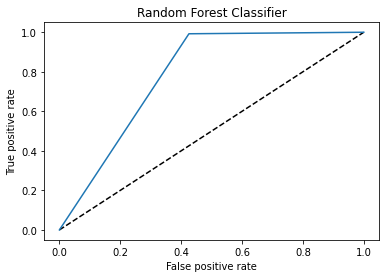

In [95]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier(area=%0.2f)'%roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [96]:
auc_score=roc_auc_score(y_test,final.predict(x_test))
print('Auc score:',auc_score)

Auc score: 0.7833878887070377


Now my AUC score is good means my model is working very well

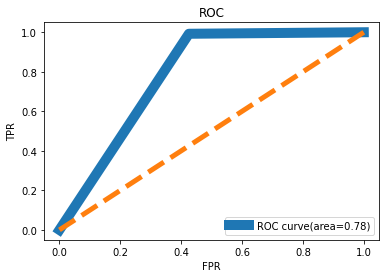

In [97]:
fpr, tpr, thresholds = roc_curve (y_test,pred)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,lw=10,label='ROC curve(area=%0.2f)'%roc_auc)

plt.plot([0,1],[0,1],lw=5,linestyle='--')
#plt.xlim([0.0,1.0])
#plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

# Saving the model using .pkl

In [102]:
import pickle
pickle.dump(final,open(' Loan Application Prediction dataset Analysis','wb'))

In [104]:
loaded_model= pickle.load(open(" Loan Application Prediction dataset Analysis","rb"))
prediction= loaded_model.predict(x_test)
a= np.array(y_test)
df=pd.DataFrame()
df['predicted']= prediction
df['actual']= a
df

,predicted,actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0
...,...,...
172,1,1
173,1,1
174,1,1
175,1,1
